<a href="https://colab.research.google.com/github/kkatherineliu/machine-learning-basics/blob/main/fcc_magic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

goal: train the model to predict if the class is g or f

type: classification, supervised learning



# NOTES

supervised learning --> using labeled inputs (all the training data has corresponding output labels already) to train models and learn outputs
- classification: predict discrete classes

unsupervised learning --> unlabeled data is used to learn patterns within the data (giving structure to unstructured data, helpful to cluster things tgt)

reinforcement learning

<hr>

### qualitative data ###
- nominal data (no inherent order)
  - one-hot encoding is used for this
- ordinal data (has inherent order, like "happiness" rating)
  - simply label in ascending order


### quanitative data ###
- discrete (countable)
- continuous

^^ all the above are the features we can have **(feature vectors)** and feed into the model

# CODE

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [8]:
cols = ["fLength", "fWdith", "fSize","fCone","fConci", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols) # creates a df in pandas

In [9]:
df["class"] = (df["class"] == "g").astype(int)
#changes the column into a 1 if true (if g) and 0 otherwise
#note that we alr know the classes are either g or f btw

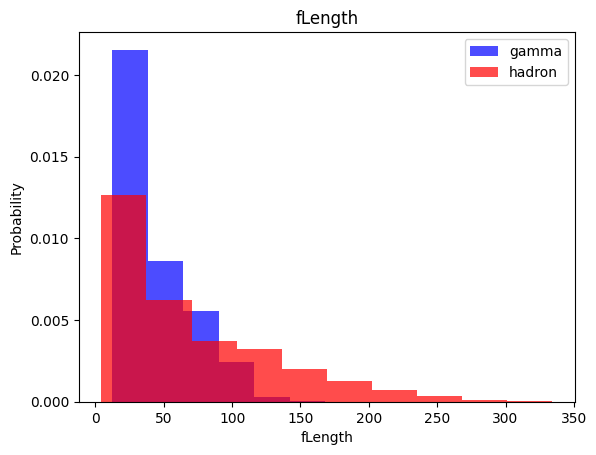

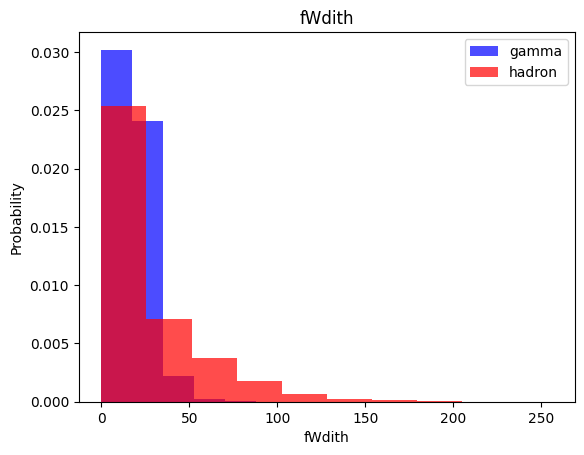

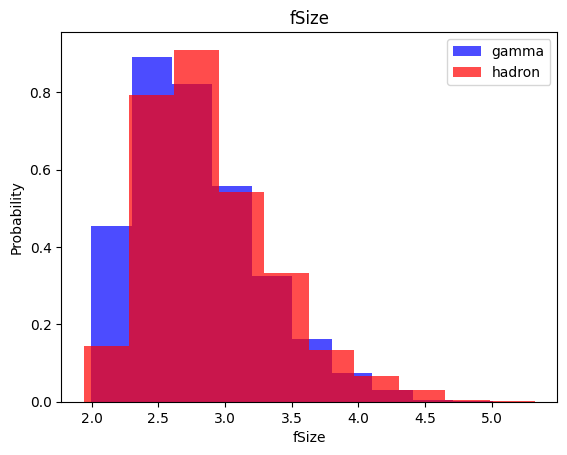

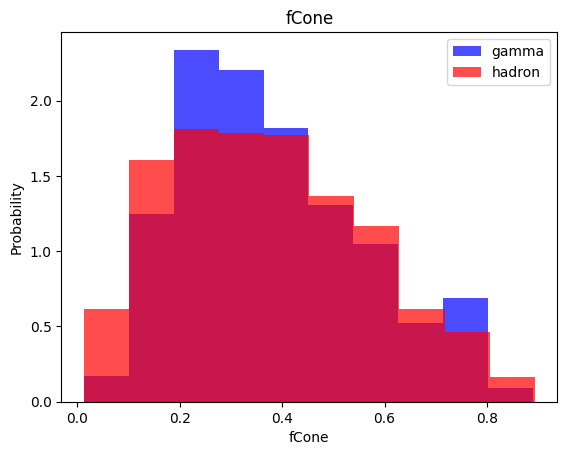

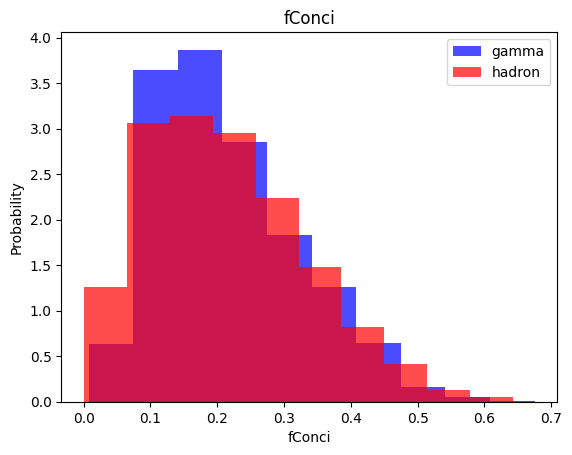

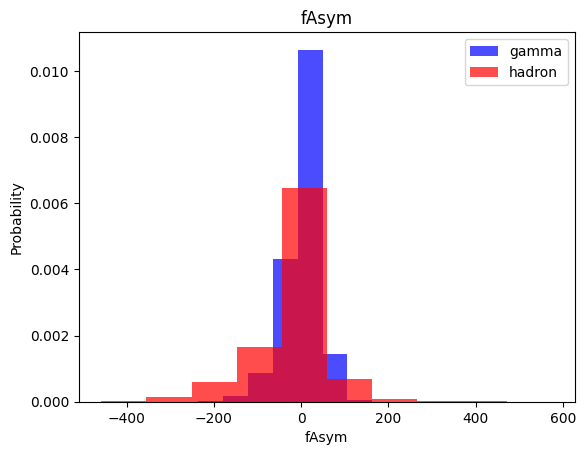

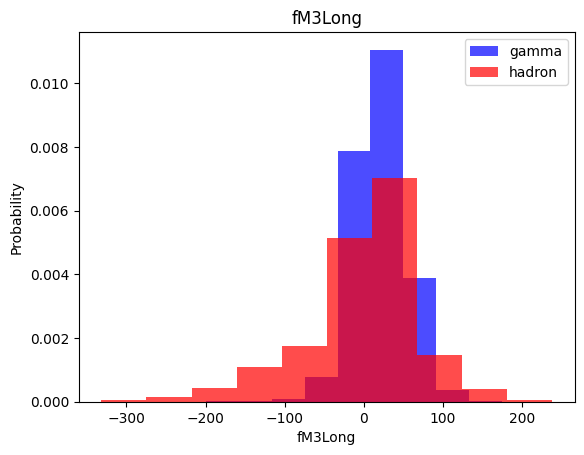

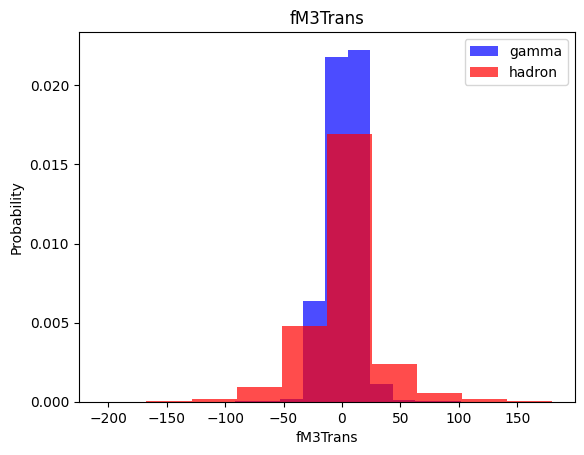

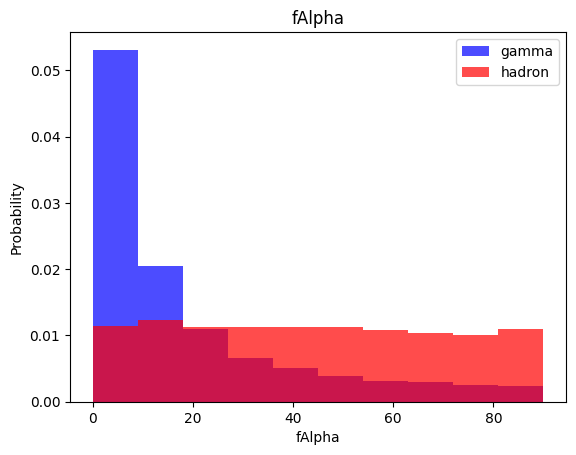

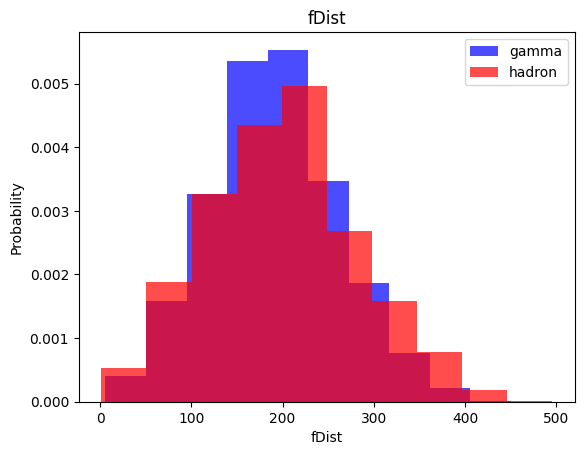

In [10]:
for label in cols[:-1]:
    plt.hist(df[df["class"] ==1][label], color="blue", label="gamma",alpha=0.7, density=True) #density normalizes over samples to account for uneven number of samples in the two categories
    plt.hist(df[df["class"] ==0][label], color="red", label="hadron",alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


#Train, validation, test datasets

In [11]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  # this is because we know the last col is output

  scaler = StandardScaler()
  X = scaler.fit_transform(X) # to get rid of the issue of some numbers being in the 100s and some being 0.1s

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y) # keep sampling smaller dataset to fit it

  data = np.hstack((X, np.reshape(y, (-1, 1)))) # put them side by side (not on top of each other)
  # reshape y (bc numpy can't deal with a 2d (x) and 1d (y) df)
  # (-1, 1) means make it a 2d array and -1 means to infer the length which ends up being len(y)

  return data, X, y

In [13]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
# .sample part shuffles, 60% is the first split, 60-80% is validation, the rest is test

In [14]:
len(train[train["class"]==1]) #gamma
len(train[train["class"]==0]) #hadron

# gamma set is ~8000 and hadron is ~4000 but that could cause issues
# so we want to oversample in our training set

4109

In [15]:
train, X_train, y_train = scale_dataset(train, oversample=True)
# so now the datasets have been rebalanced between type 0 and type 1
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test) #default oversample is False


# kNN

uses euclidean distance between points (the new point takes on the label of whatever its "nearest neighbouts" has)

k is like the number of neighbours

ofc the assumption is that points close by are similar to each other

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=1) #3,5 both suitable numbers too
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
y_pred = knn_model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.72      1312
           1       0.84      0.88      0.86      2492

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



accuracy 82% --> we get 82% of them right

precision = true positive divided by the labelled positives (includes both true and false positives)

recall = true positive divided by all the positive ones (true positive + false negative)

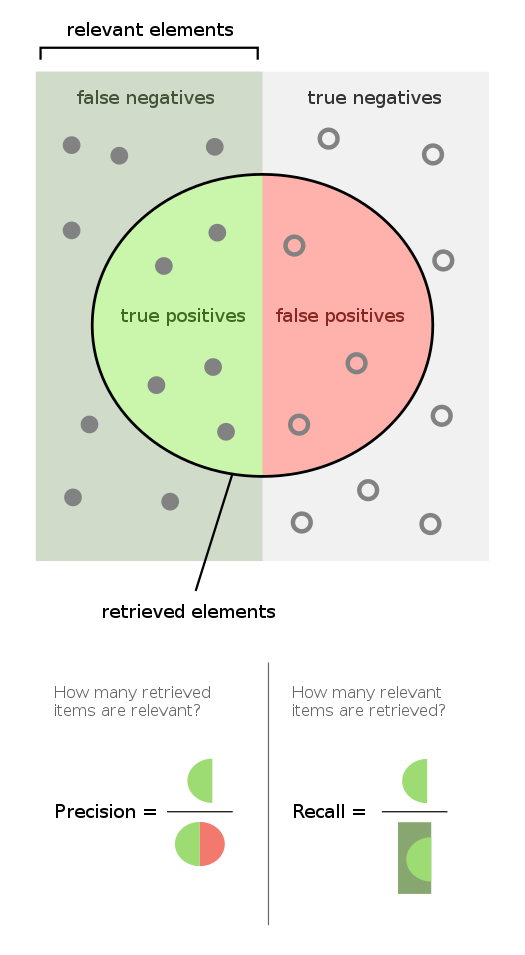

In [21]:
y_test

array([0, 0, 0, ..., 1, 1, 0])

# Naive Bayes

assumption: all the features are independent which is why we can just multiply it out essentially and use that pi notation

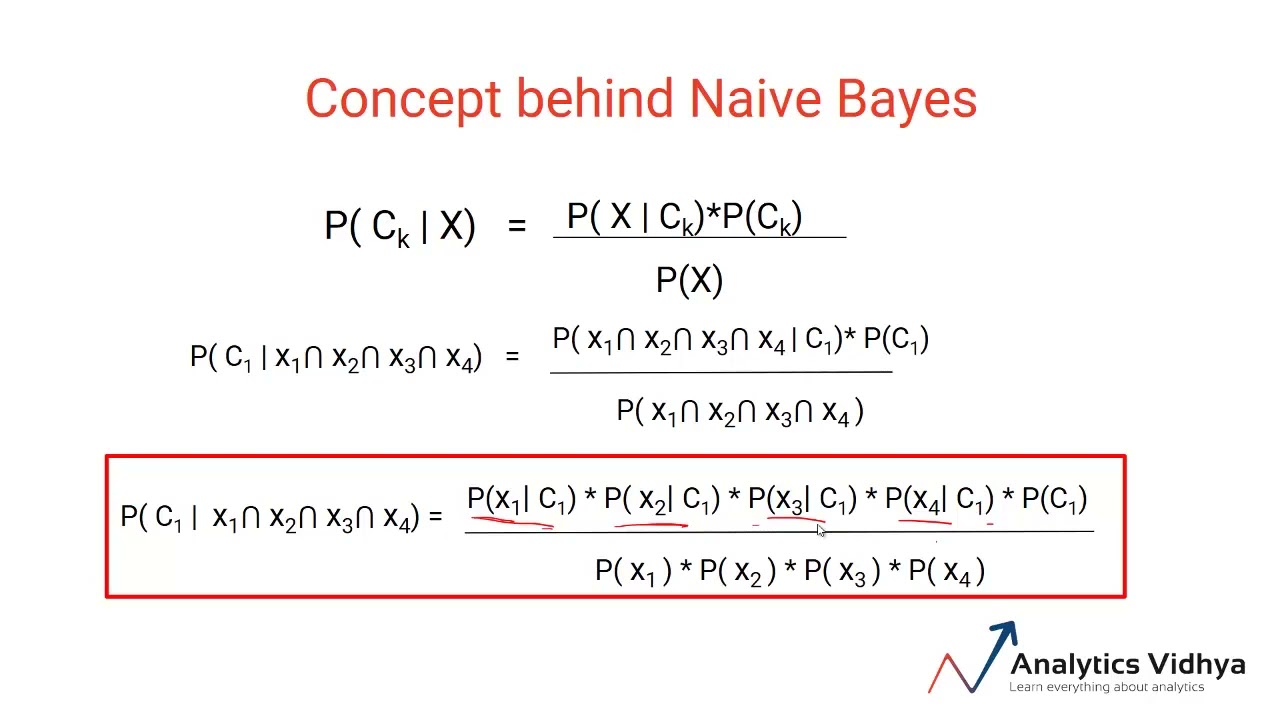

$\hat{y} =$ argmax $P(C_k|x_1, x_2, ... x_n)$ for $k \in \{1,k\}$

(note that argmax just means to pick the k that maximizes the expression)

$\hat{y} =$argmax $ P(C_k) \prod_{i=1}^n P(x_i | C_k)$ from the approximation and assumptions mentioned above

MAP: Maximum A Posteriori (pick a k that is most probable so that we minimize the probability of misclassification)


In [26]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [29]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred)) # got worse

              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1312
           1       0.74      0.88      0.80      2492

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

fitting the data to a sigmoid function

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lg_model = LogisticRegression() # can set specific parameters
lg_model = lg_model.fit(X_train, y_train)

In [35]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1312
           1       0.85      0.81      0.83      2492

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



# Support Vector Machines (SVM)

creating a "line" (more accurately a hyperplane) that best divides the two classes with a somewhat evenly distributed and the largest "margin"

the data points on the margin line are "support vectors"

doesn't deal with outliers well, a single outlier would still change the location of the support vectors

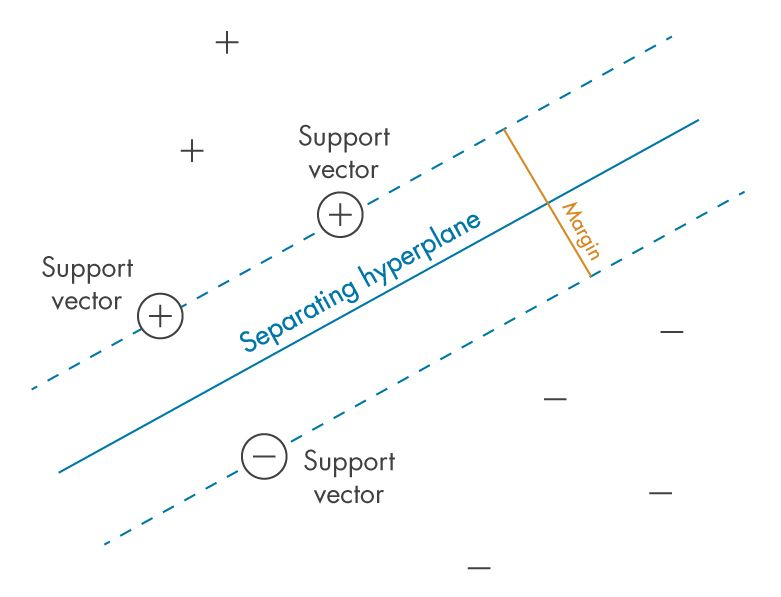



kernel trick
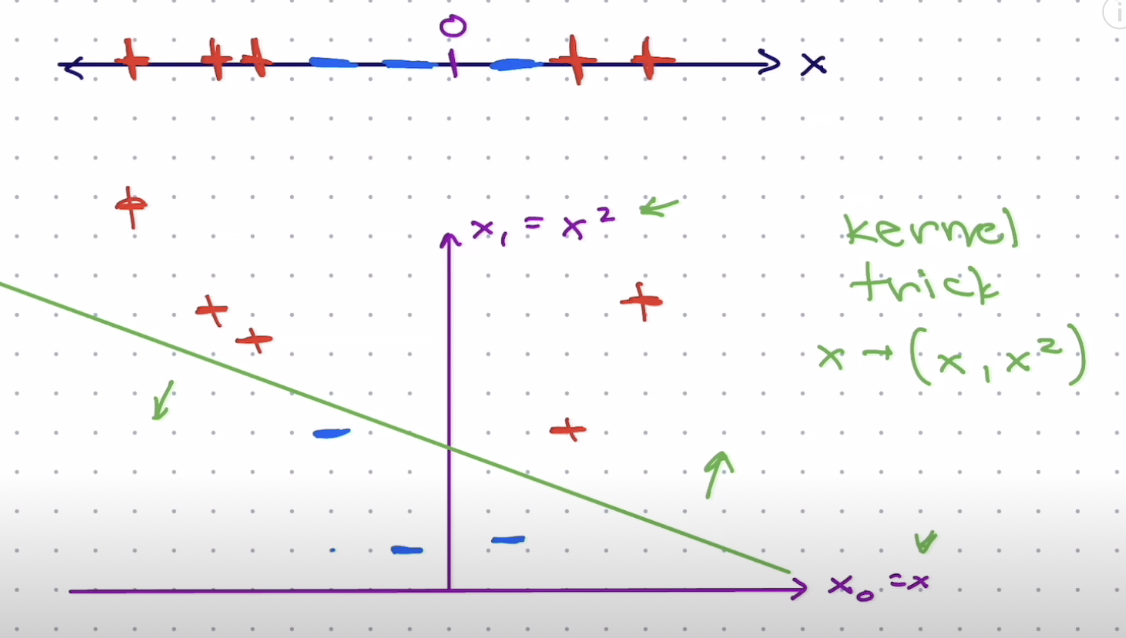

In [33]:
from sklearn.svm import SVC

In [37]:
svm_model = SVC() # all of them have hyperparameters we can play around with
svm_model = svm_model.fit(X_train, y_train)

In [38]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1312
           1       0.89      0.89      0.89      2492

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

gradient descent and backpropagation

update the weight using a learning rate (training portion)

In [40]:
import tensorflow as tf

In [51]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) # one plot w 2 columns

  # one for loss
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  # one for accuracy
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [55]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob), #prevents overfitting
      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid") # projecting the predictions to be 0 or 1
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy",
                  metrics=["accuracy"])

  history = nn_model.fit(
      X_train, y_train, epochs=epochs, # number of training cycles
      batch_size=batch_size, validation_split=0.2, # additional 20% validation stuff
      verbose=0
      ) # don't print anything out
      # could be better to have validation_data set to our data set we alr created in the beginning

  return nn_model, history


16 nodes, dropout 0, lr 0.01, batch size 32


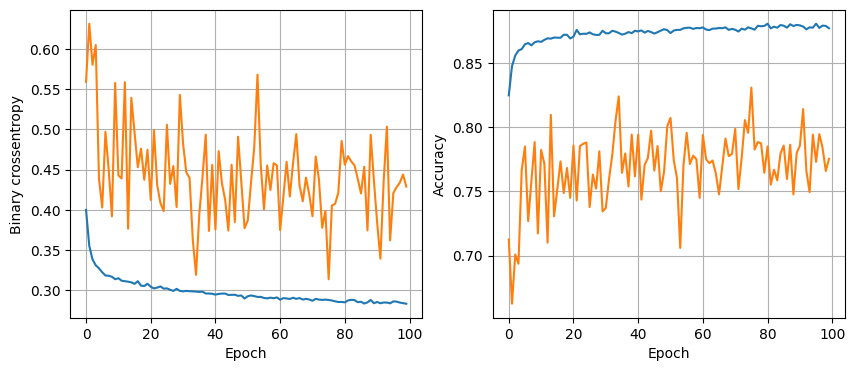

119/119 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8770
16 nodes, dropout 0, lr 0.01, batch size 64


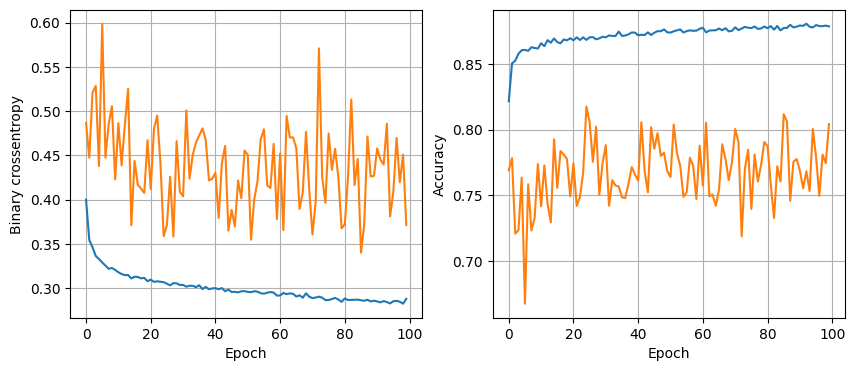

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.01, batch size 128


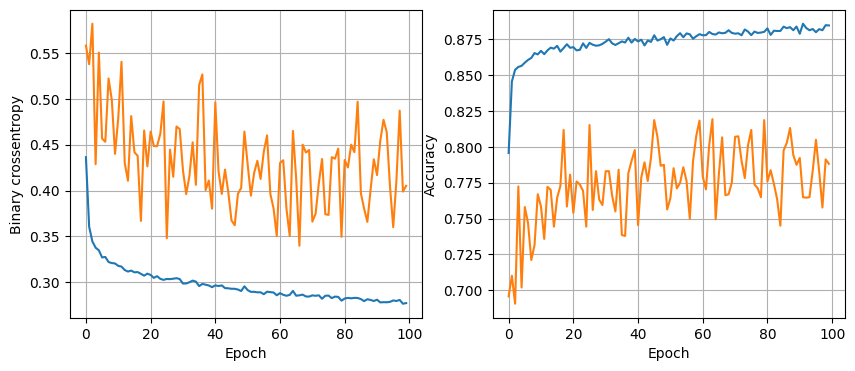

119/119 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.8885
16 nodes, dropout 0, lr 0.005, batch size 32


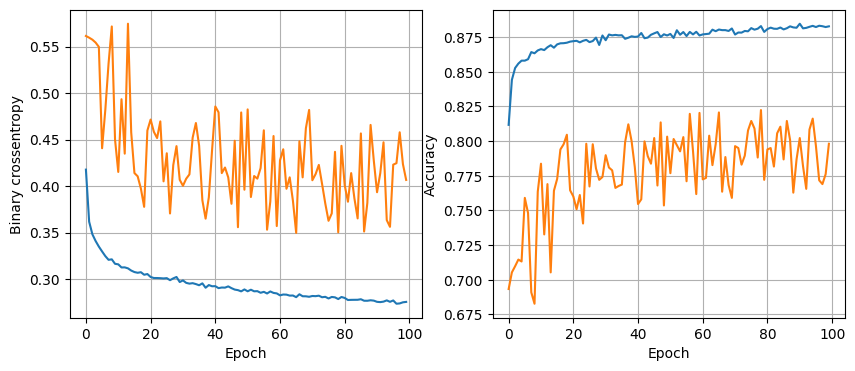

119/119 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8791
16 nodes, dropout 0, lr 0.005, batch size 64


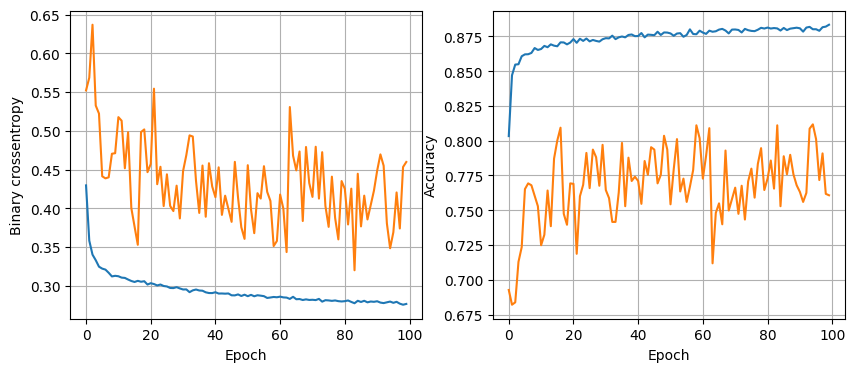

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8796
16 nodes, dropout 0, lr 0.005, batch size 128


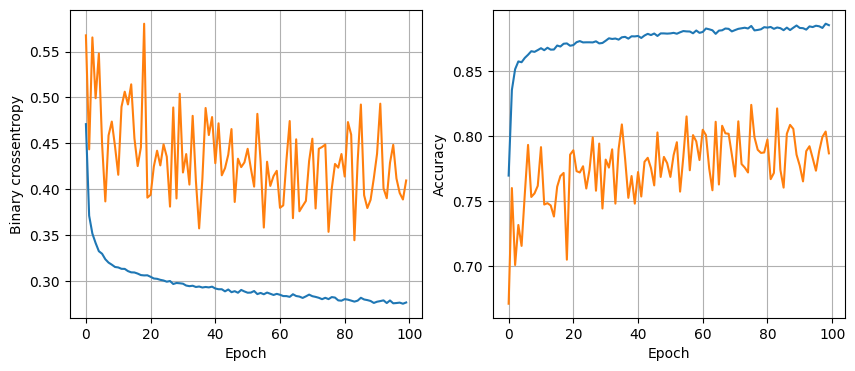

119/119 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8862
16 nodes, dropout 0, lr 0.001, batch size 32


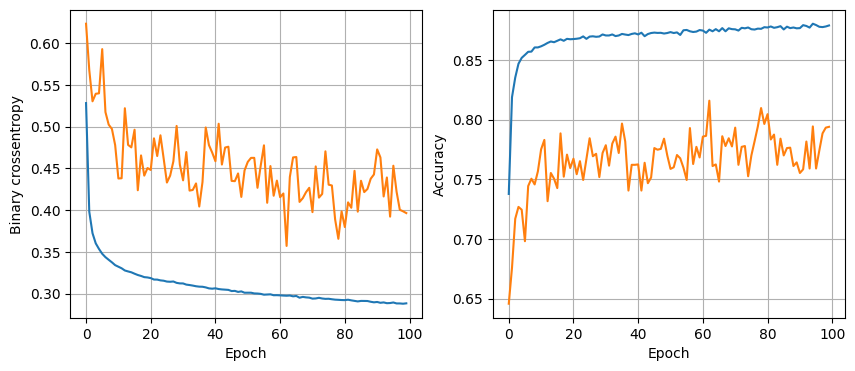

119/119 [==============================] - 0s 3ms/step - loss: 0.2988 - accuracy: 0.8772
16 nodes, dropout 0, lr 0.001, batch size 64


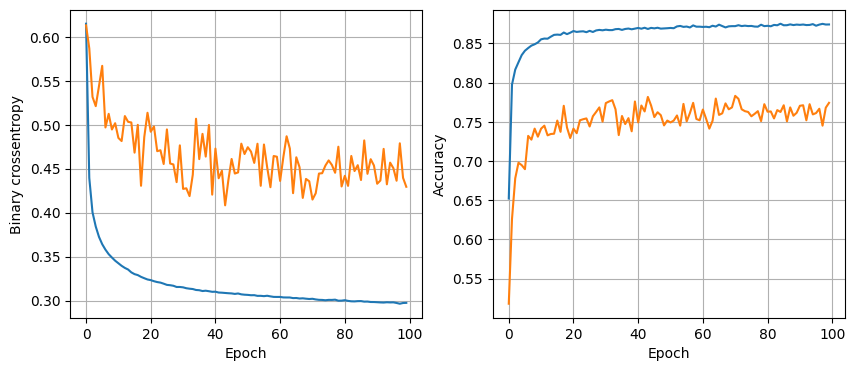

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8838
16 nodes, dropout 0, lr 0.001, batch size 128


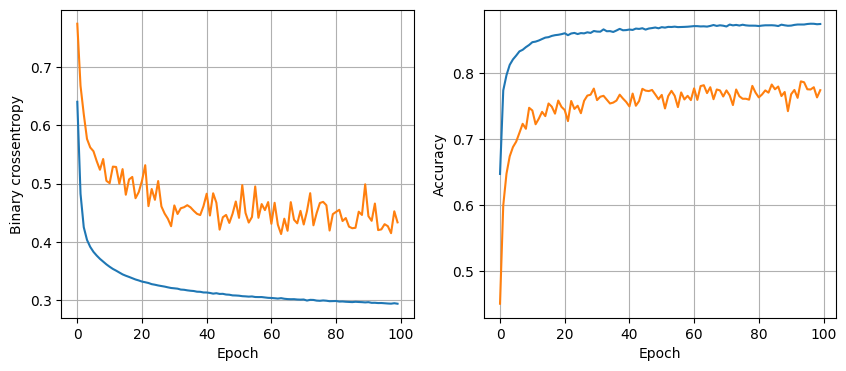

119/119 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8804
16 nodes, dropout 0.2, lr 0.01, batch size 32


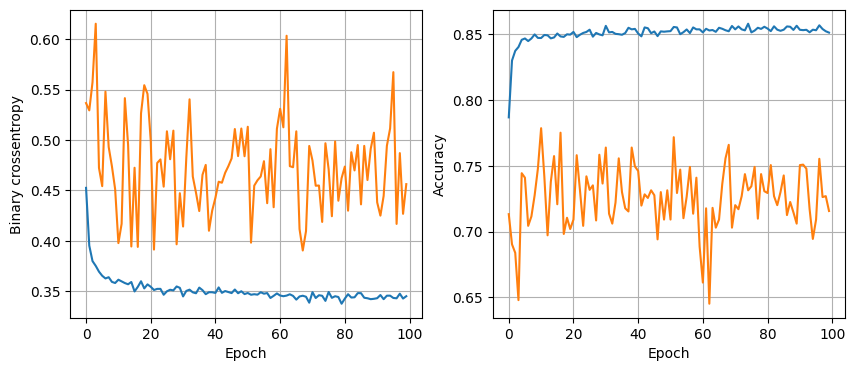

119/119 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8764
16 nodes, dropout 0.2, lr 0.01, batch size 64


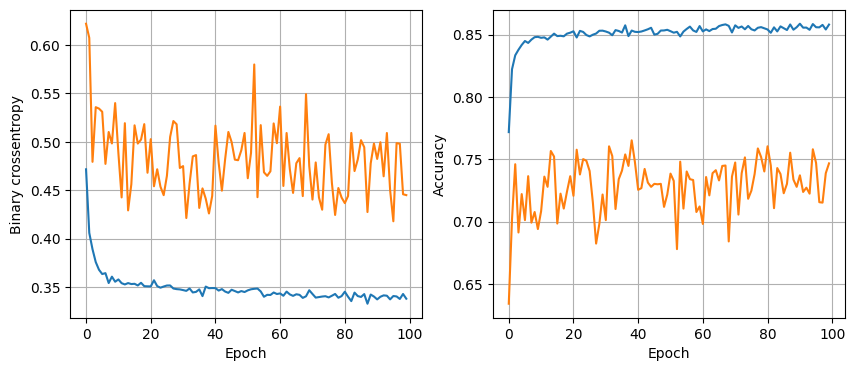

119/119 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.01, batch size 128


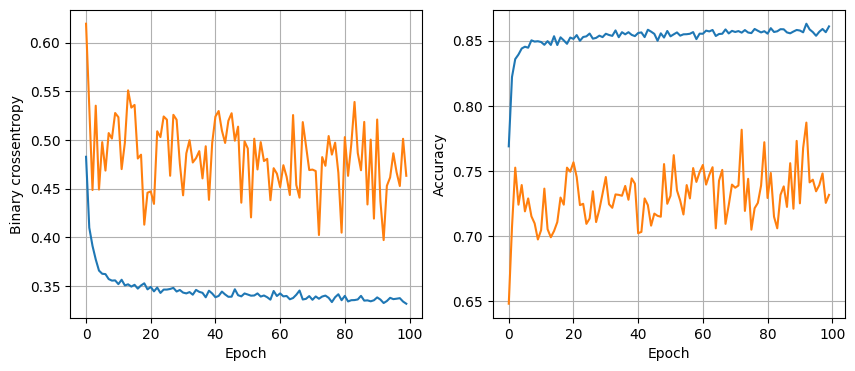

119/119 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8788
16 nodes, dropout 0.2, lr 0.005, batch size 32


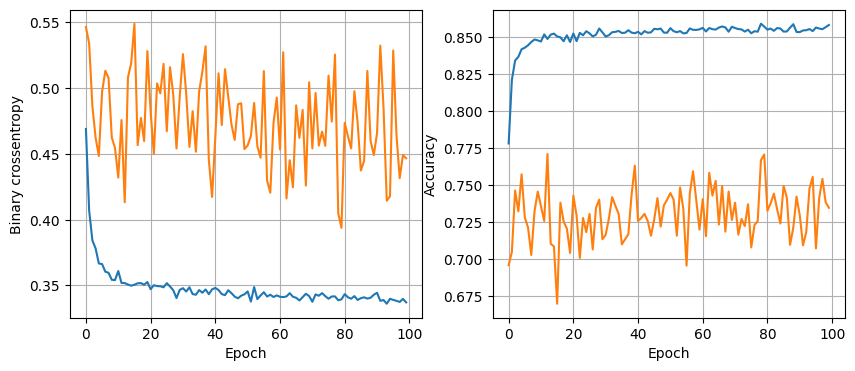

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8812
16 nodes, dropout 0.2, lr 0.005, batch size 64


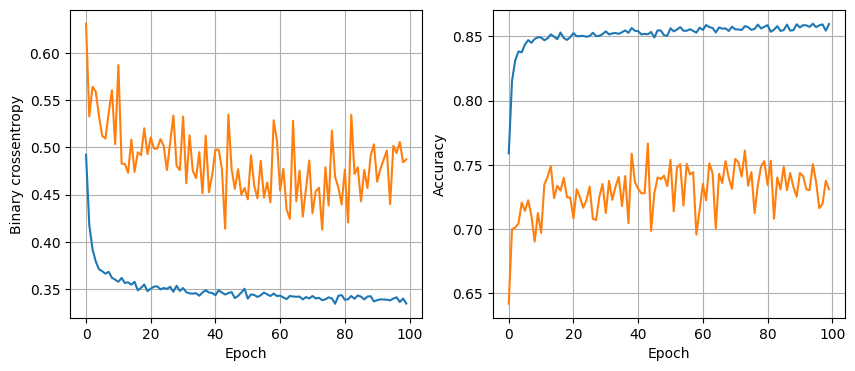

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8749
16 nodes, dropout 0.2, lr 0.005, batch size 128


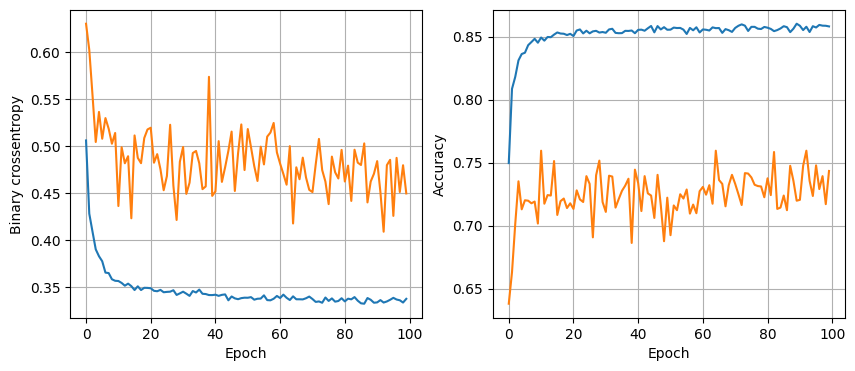

119/119 [==============================] - 0s 4ms/step - loss: 0.3039 - accuracy: 0.8791
16 nodes, dropout 0.2, lr 0.001, batch size 32


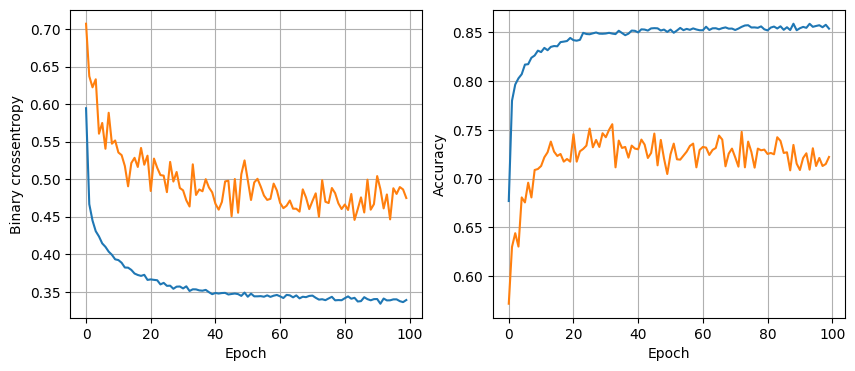

119/119 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8749
16 nodes, dropout 0.2, lr 0.001, batch size 64


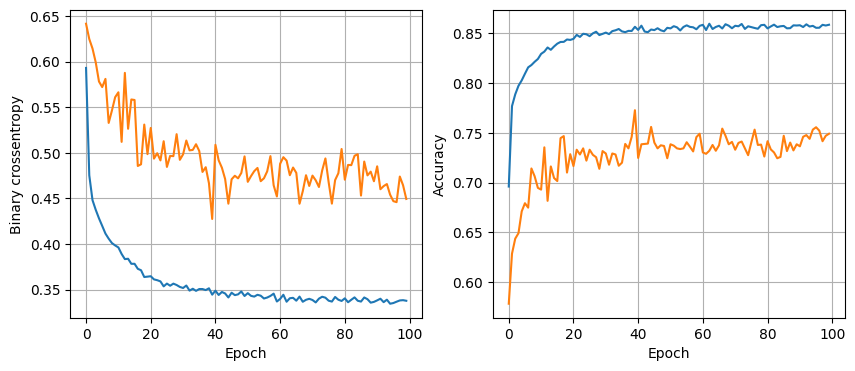

119/119 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8764
16 nodes, dropout 0.2, lr 0.001, batch size 128


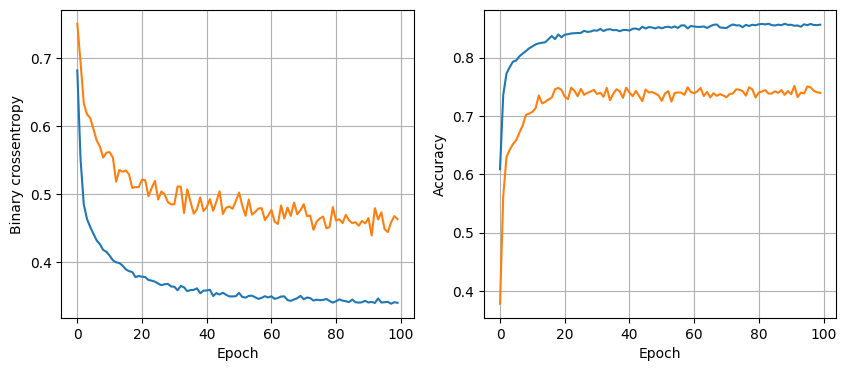

119/119 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 0.8804
32 nodes, dropout 0, lr 0.01, batch size 32


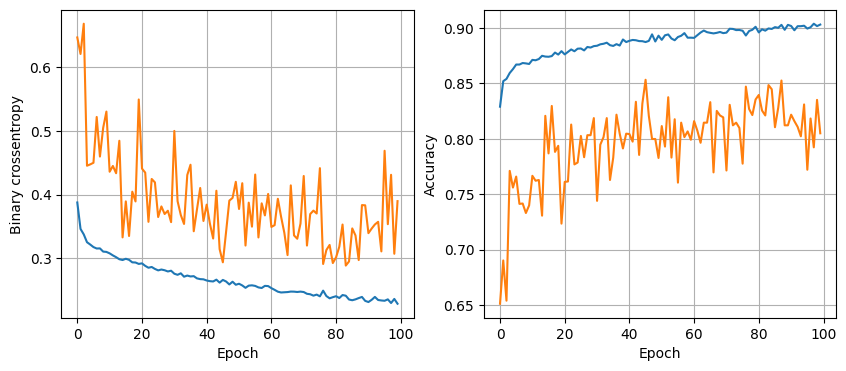

119/119 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8683
32 nodes, dropout 0, lr 0.01, batch size 64


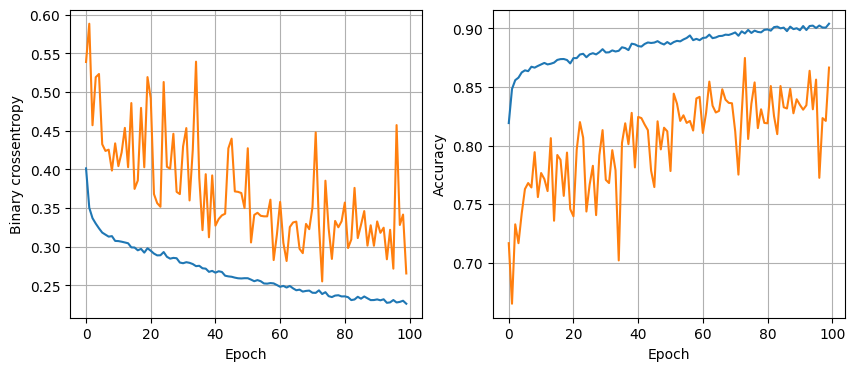

119/119 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8638
32 nodes, dropout 0, lr 0.01, batch size 128


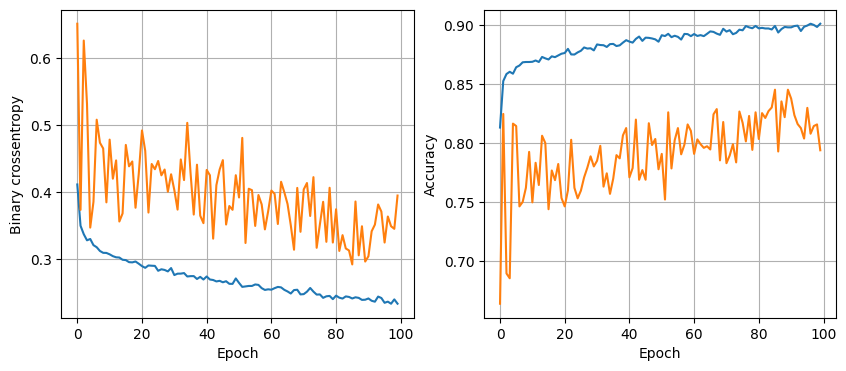

119/119 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8746
32 nodes, dropout 0, lr 0.005, batch size 32


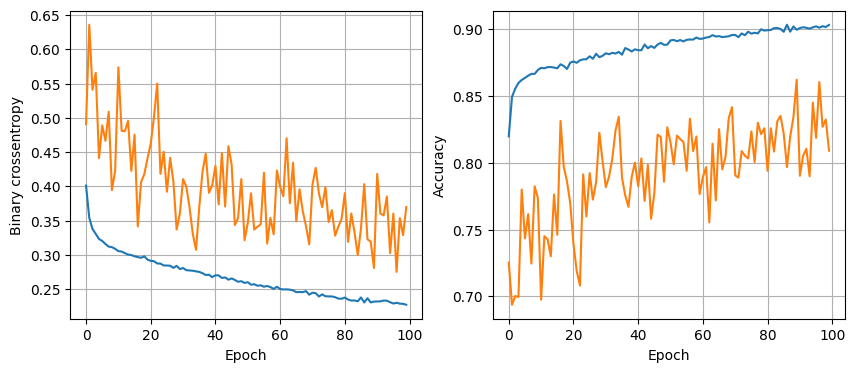

119/119 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8738
32 nodes, dropout 0, lr 0.005, batch size 64


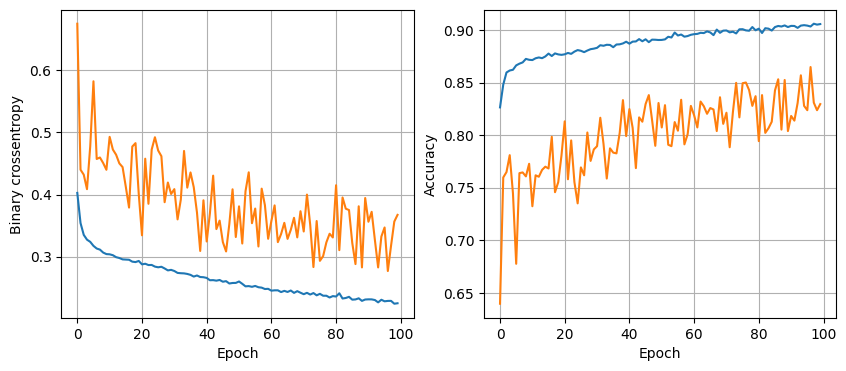

119/119 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8733
32 nodes, dropout 0, lr 0.005, batch size 128


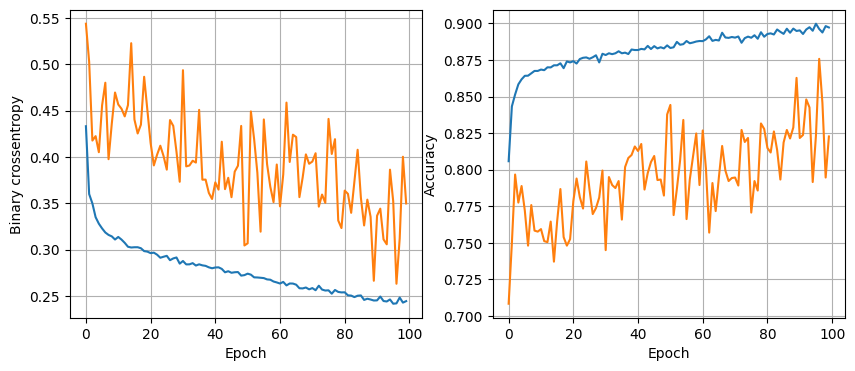

119/119 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8693
32 nodes, dropout 0, lr 0.001, batch size 32


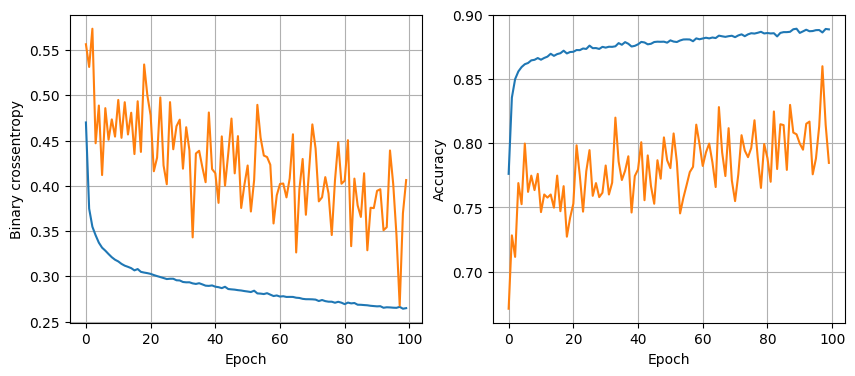

119/119 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8725
32 nodes, dropout 0, lr 0.001, batch size 64


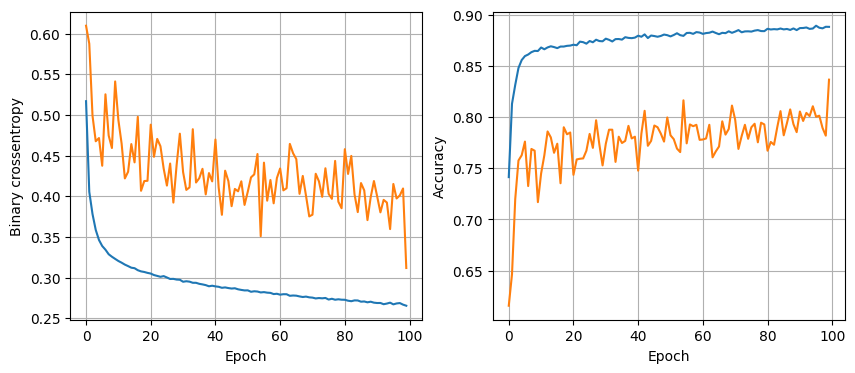

119/119 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8757
32 nodes, dropout 0, lr 0.001, batch size 128


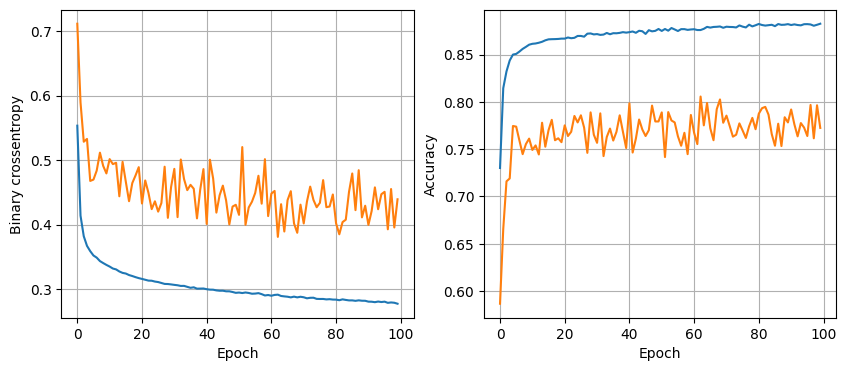

119/119 [==============================] - 0s 4ms/step - loss: 0.2932 - accuracy: 0.8820
32 nodes, dropout 0.2, lr 0.01, batch size 32


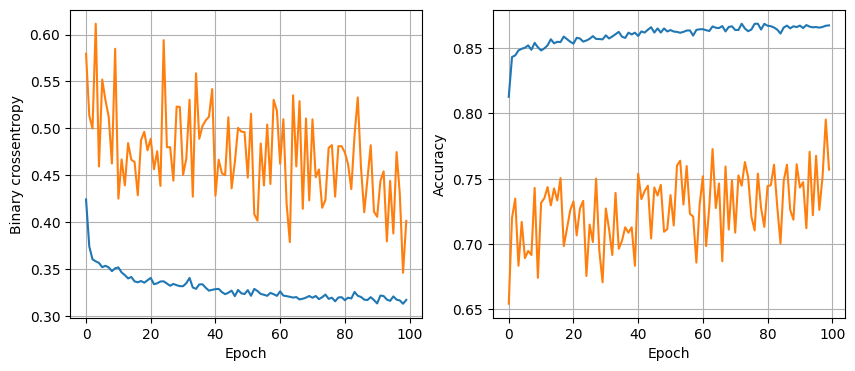

119/119 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8849
32 nodes, dropout 0.2, lr 0.01, batch size 64


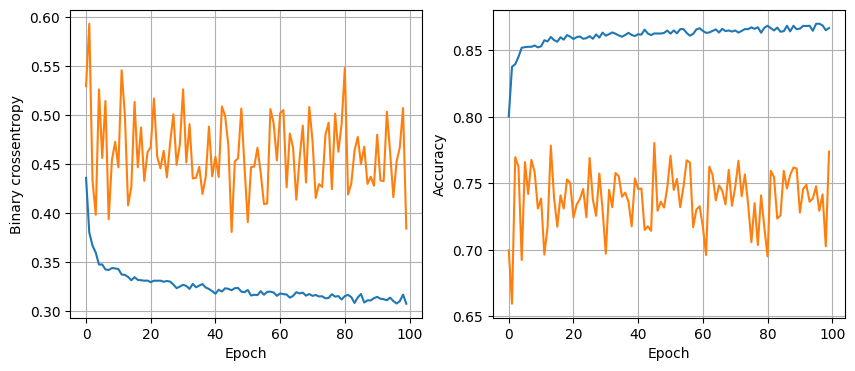

119/119 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.8828
32 nodes, dropout 0.2, lr 0.01, batch size 128


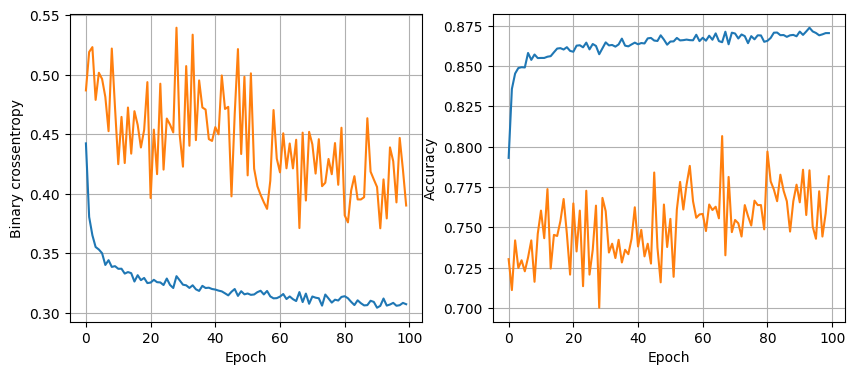

119/119 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.8796
32 nodes, dropout 0.2, lr 0.005, batch size 32


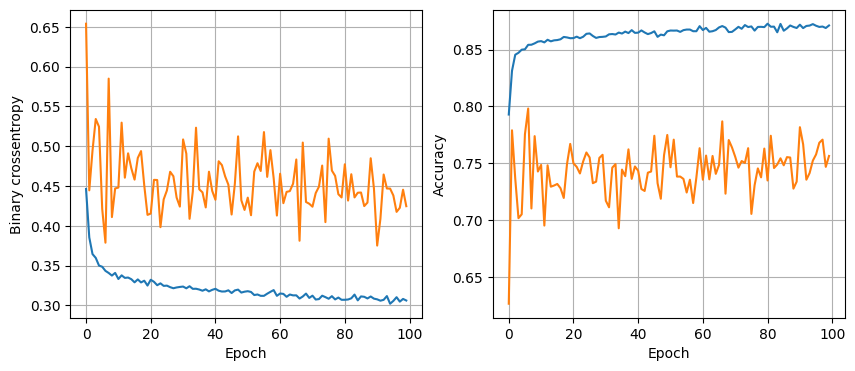

119/119 [==============================] - 0s 4ms/step - loss: 0.2933 - accuracy: 0.8828
32 nodes, dropout 0.2, lr 0.005, batch size 64


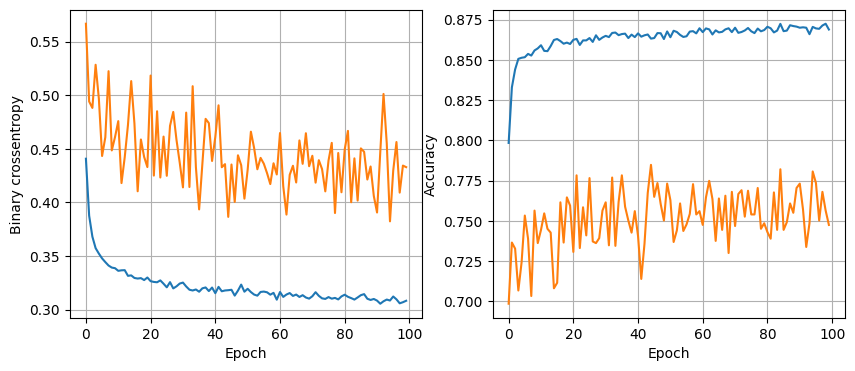

119/119 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.8793
32 nodes, dropout 0.2, lr 0.005, batch size 128


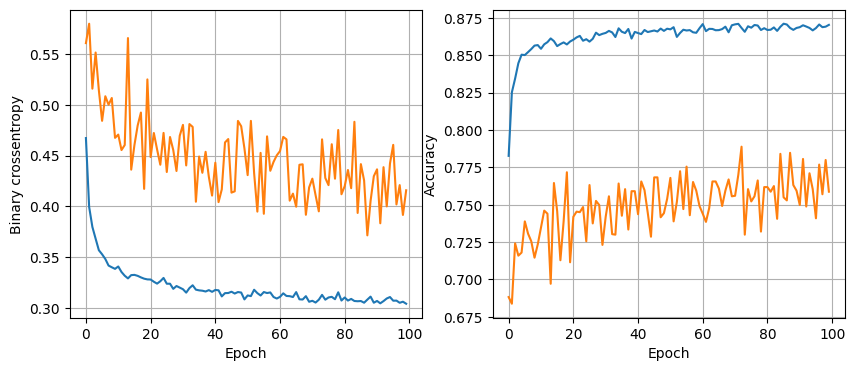

119/119 [==============================] - 1s 7ms/step - loss: 0.2893 - accuracy: 0.8851
32 nodes, dropout 0.2, lr 0.001, batch size 32


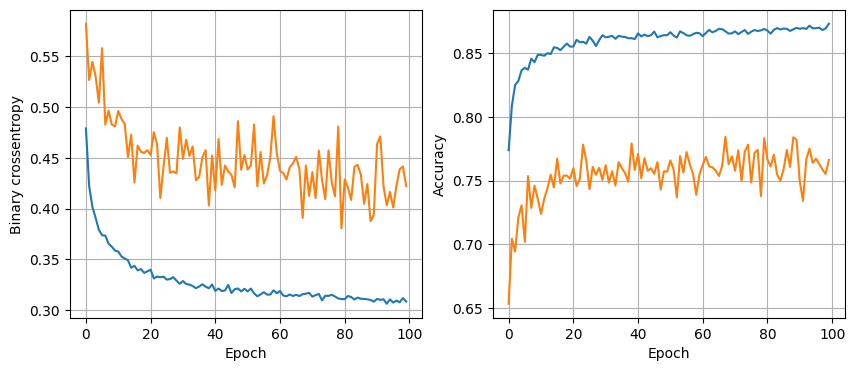

119/119 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.001, batch size 64


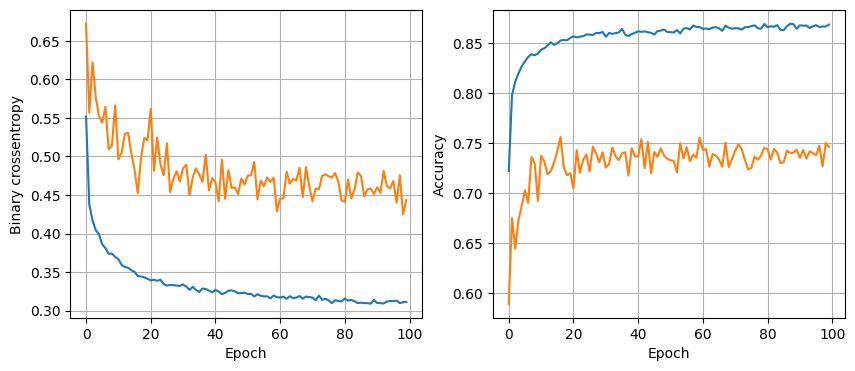

119/119 [==============================] - 1s 5ms/step - loss: 0.2915 - accuracy: 0.8814
32 nodes, dropout 0.2, lr 0.001, batch size 128


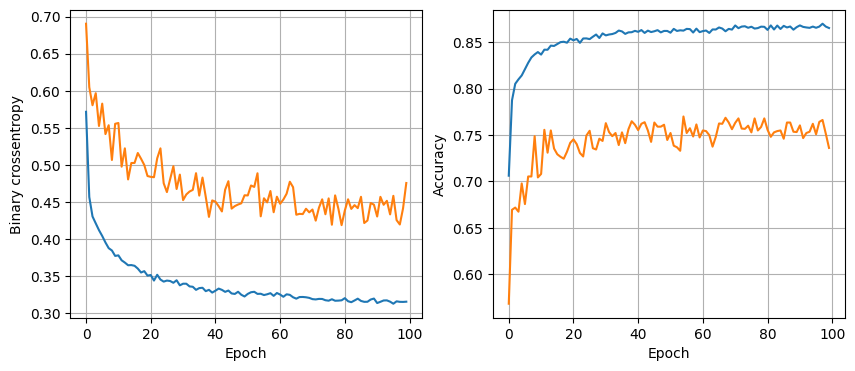

119/119 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.8820
64 nodes, dropout 0, lr 0.01, batch size 32


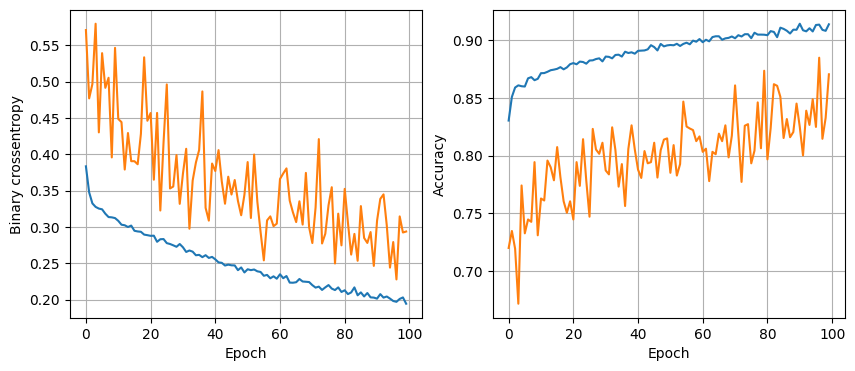

119/119 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.8683
64 nodes, dropout 0, lr 0.01, batch size 64


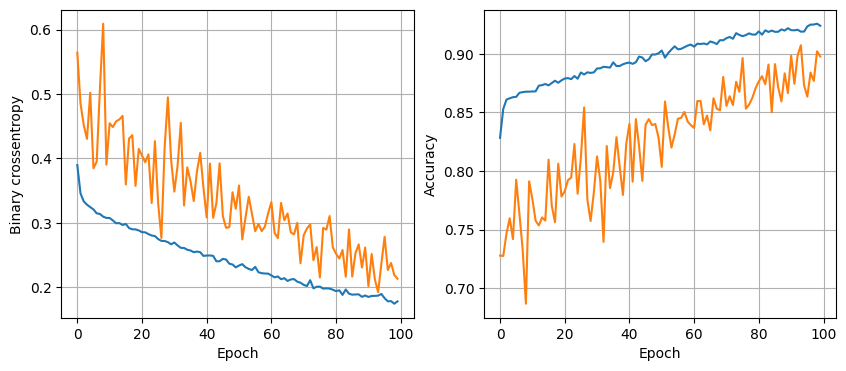

119/119 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.8591
64 nodes, dropout 0, lr 0.01, batch size 128


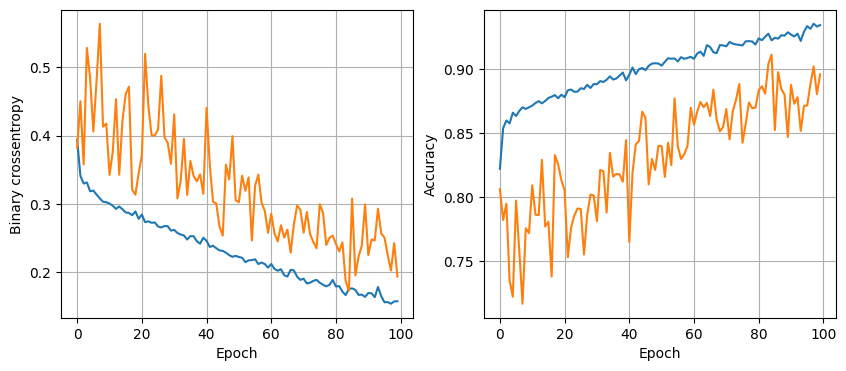

119/119 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.8575
64 nodes, dropout 0, lr 0.005, batch size 32


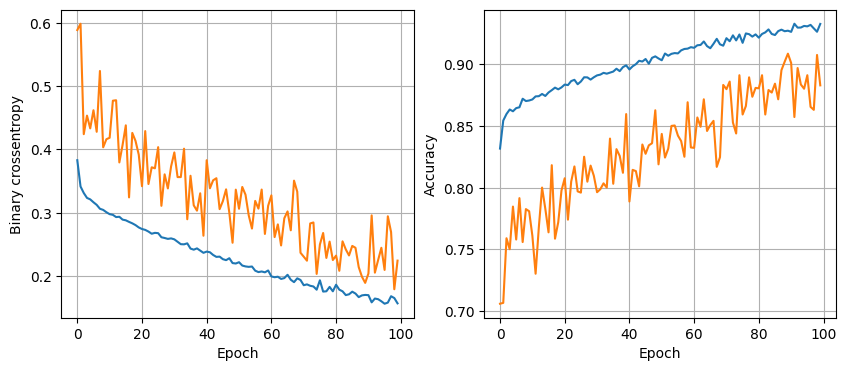

119/119 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.8693
64 nodes, dropout 0, lr 0.005, batch size 64


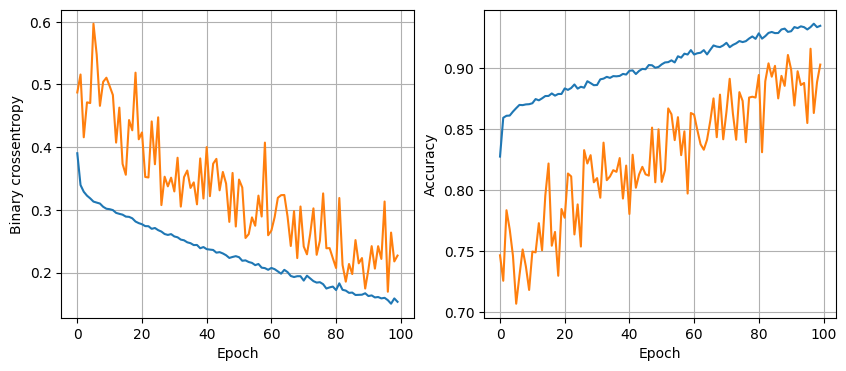

119/119 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.8594
64 nodes, dropout 0, lr 0.005, batch size 128


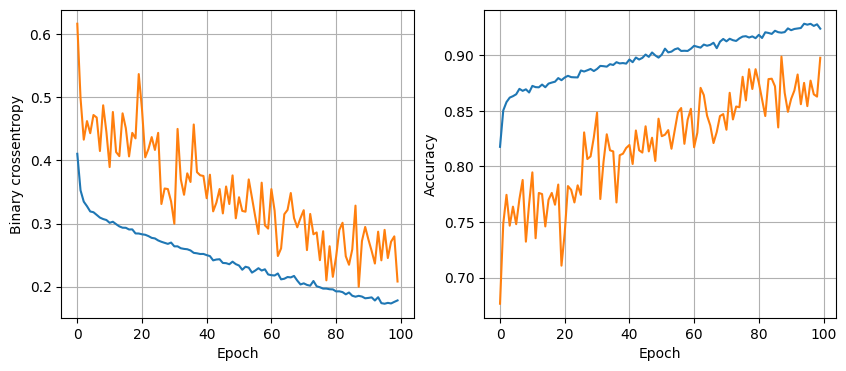

119/119 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8536
64 nodes, dropout 0, lr 0.001, batch size 32


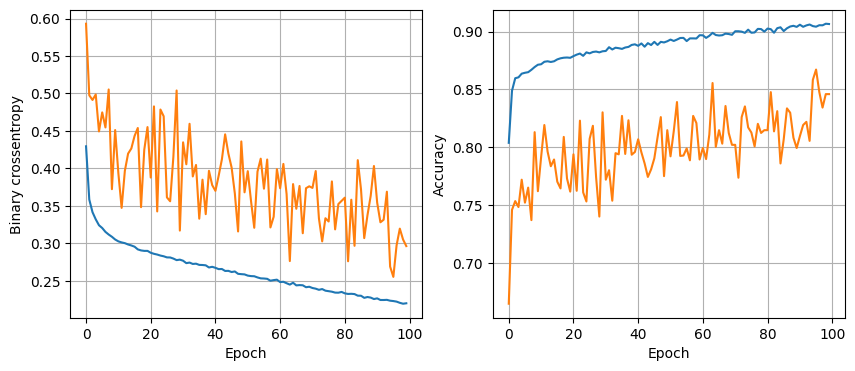

119/119 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8828
64 nodes, dropout 0, lr 0.001, batch size 64


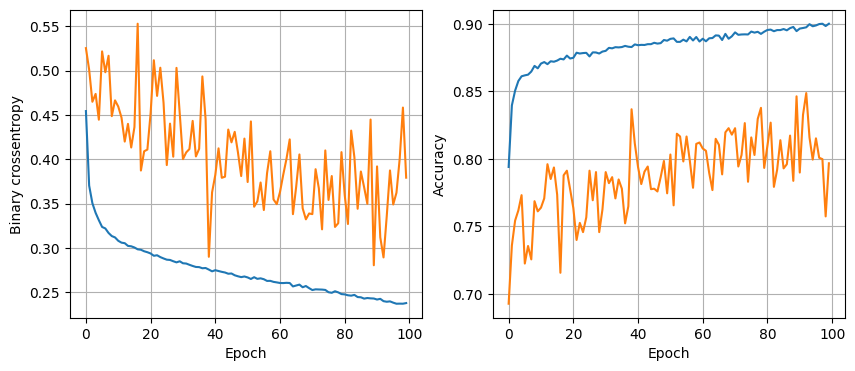

119/119 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8764
64 nodes, dropout 0, lr 0.001, batch size 128


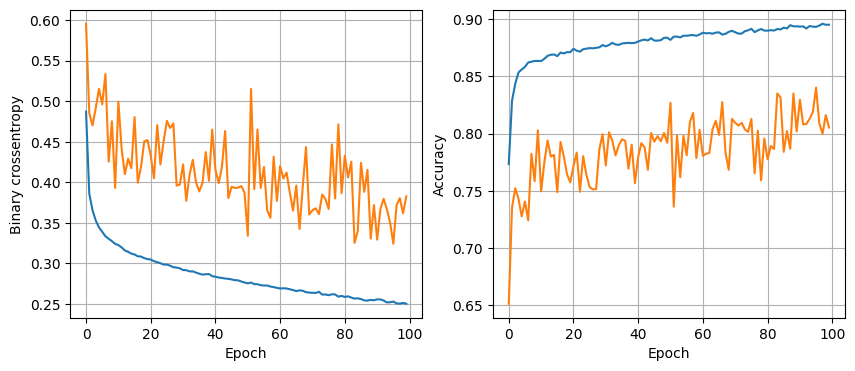

119/119 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.01, batch size 32


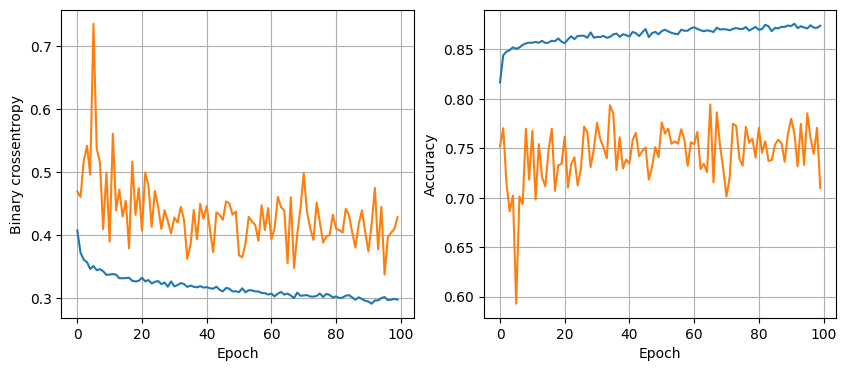

119/119 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.01, batch size 64


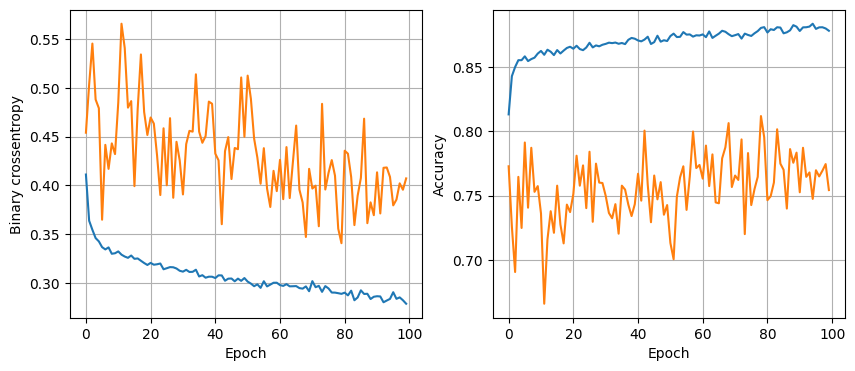

119/119 [==============================] - 1s 4ms/step - loss: 0.2951 - accuracy: 0.8788
64 nodes, dropout 0.2, lr 0.01, batch size 128


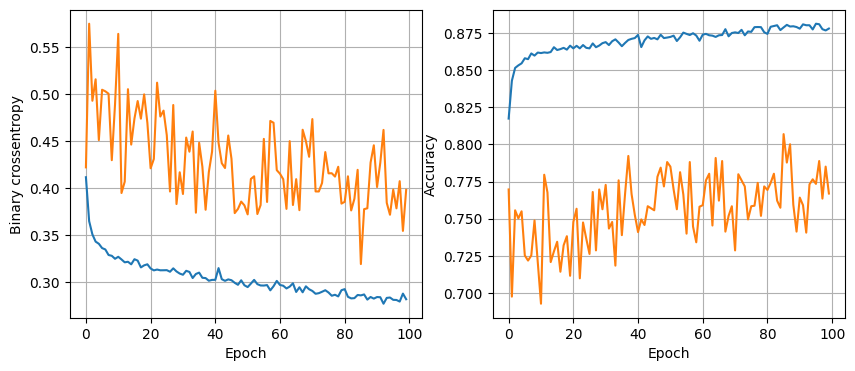

119/119 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.8828
64 nodes, dropout 0.2, lr 0.005, batch size 32


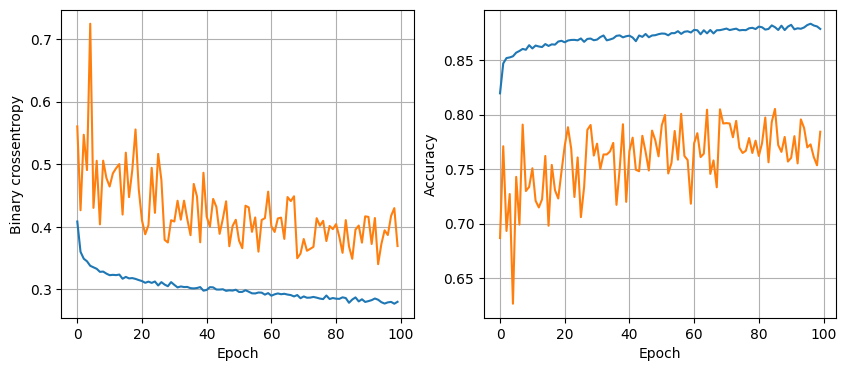

119/119 [==============================] - 0s 3ms/step - loss: 0.2894 - accuracy: 0.8838
64 nodes, dropout 0.2, lr 0.005, batch size 64


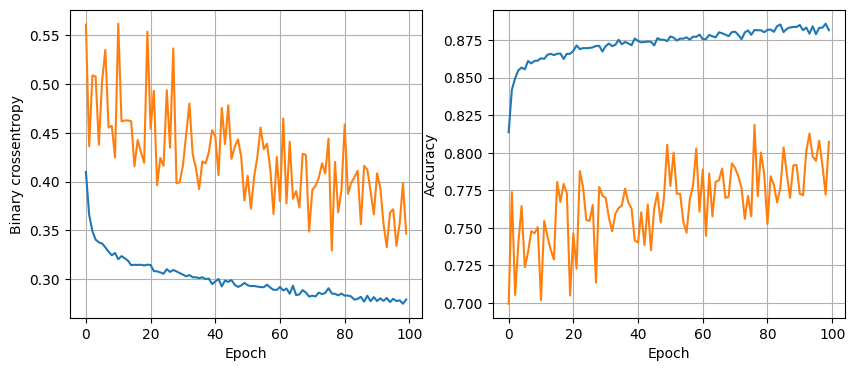

119/119 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8825
64 nodes, dropout 0.2, lr 0.005, batch size 128


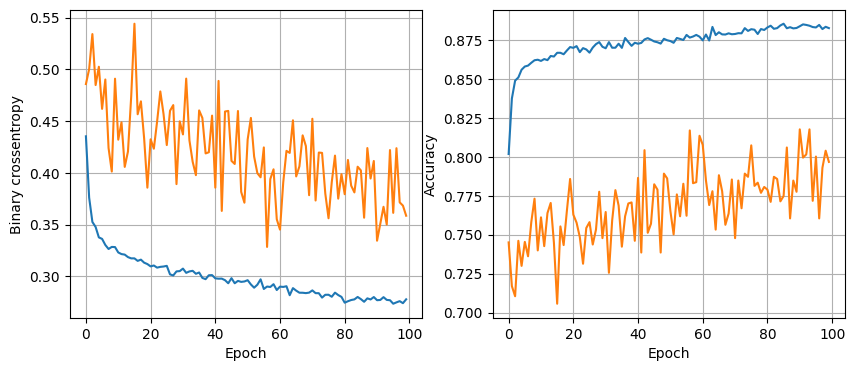

119/119 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.8856
64 nodes, dropout 0.2, lr 0.001, batch size 32


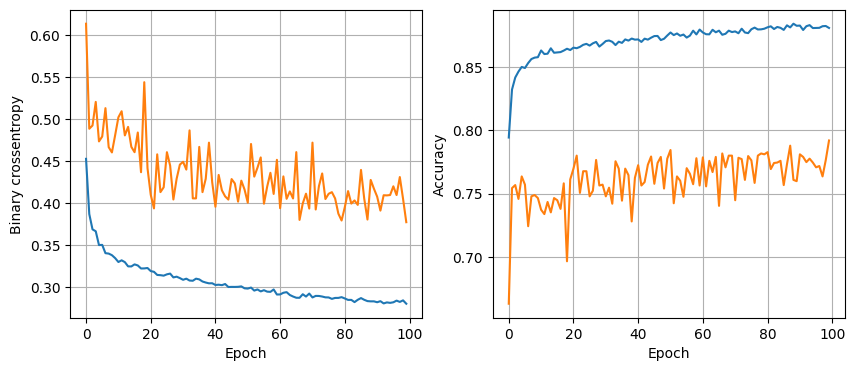

119/119 [==============================] - 0s 3ms/step - loss: 0.2873 - accuracy: 0.8917
64 nodes, dropout 0.2, lr 0.001, batch size 64


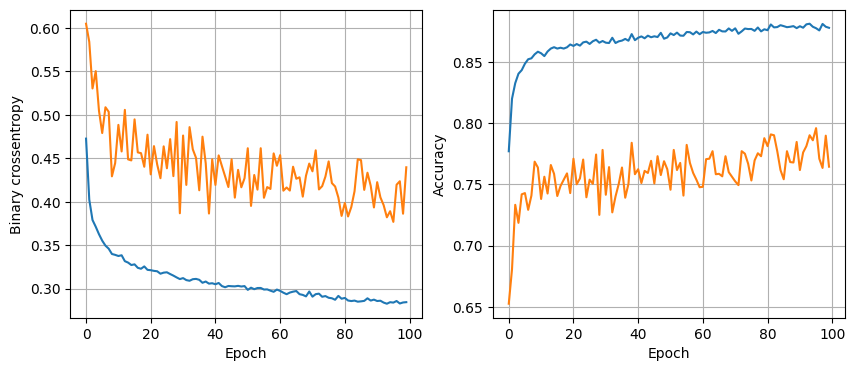

119/119 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.8864
64 nodes, dropout 0.2, lr 0.001, batch size 128


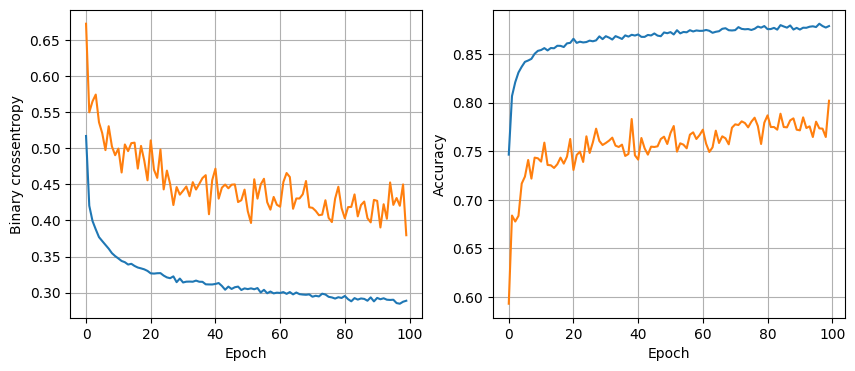

119/119 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.8854


In [58]:
# basically now we play around with the numbers

least_val_loss = float("inf")
least_lost_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0] # see the loss on our validation set

        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [59]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,) # since sigmoid approaches 0 and 1 respectively
print(classification_report(y_test, y_pred)) # turns out only a little better than SVM model

119/119 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1312
           1       0.87      0.94      0.91      2492

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

